In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('breast_cancer.csv')

In [11]:
from pycaret.classification import *

In [12]:
df.Class.astype(object)

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: object

In [18]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,two
1,5,4,4,5,7,10,3,2,1,two
2,3,1,1,1,2,2,3,1,1,two
3,6,8,8,1,3,4,3,7,1,two
4,4,1,1,3,2,1,3,1,1,two


In [19]:
df.shape

(683, 10)

In [20]:
df.groupby(['Mitoses'])['Class'].unique()

Mitoses
1     [two, four]
2     [four, two]
3     [four, two]
4          [four]
5     [two, four]
6          [four]
7     [four, two]
8     [four, two]
10         [four]
Name: Class, dtype: object

In [ ]:
df['Class']=df['Class'].replace({2:'two',4:'four'})

In [21]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [22]:
df.Class.unique()

array(['two', 'four'], dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              683 non-null    int64 
 1   Uniformity of Cell Size      683 non-null    int64 
 2   Uniformity of Cell Shape     683 non-null    int64 
 3   Marginal Adhesion            683 non-null    int64 
 4   Single Epithelial Cell Size  683 non-null    int64 
 5   Bare Nuclei                  683 non-null    int64 
 6   Bland Chromatin              683 non-null    int64 
 7   Normal Nucleoli              683 non-null    int64 
 8   Mitoses                      683 non-null    int64 
 9   Class                        683 non-null    object
dtypes: int64(9), object(1)
memory usage: 53.5+ KB


array([[<AxesSubplot:title={'center':'Clump Thickness'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Size'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Shape'}>],
       [<AxesSubplot:title={'center':'Marginal Adhesion'}>,
        <AxesSubplot:title={'center':'Single Epithelial Cell Size'}>,
        <AxesSubplot:title={'center':'Bare Nuclei'}>],
       [<AxesSubplot:title={'center':'Bland Chromatin'}>,
        <AxesSubplot:title={'center':'Normal Nucleoli'}>,
        <AxesSubplot:title={'center':'Mitoses'}>]], dtype=object)

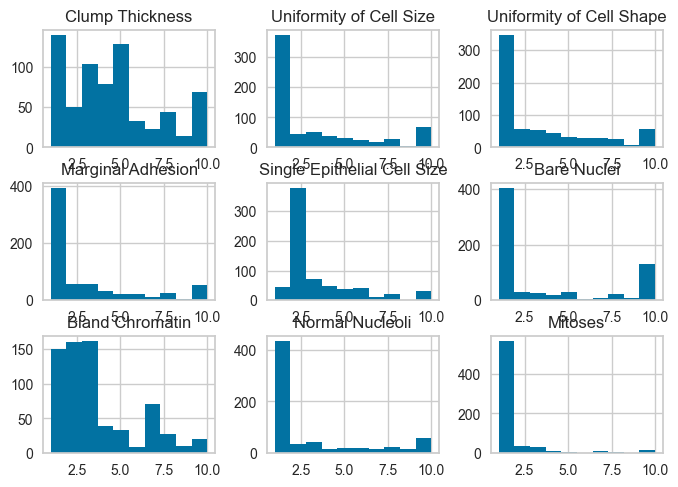

In [24]:
df.hist()

In [16]:
clf=setup(data=df,target='Class')

,Description,Value
0,session_id,2631
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"four: 0, two: 1"
4,Original Data,"(683, 10)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9749,0.9954,0.9742,0.9872,0.9804,0.9452,0.9461,0.3260
ridge,Ridge Classifier,0.9749,0.0000,0.9742,0.9873,0.9804,0.9453,0.9464,0.0050
svm,SVM - Linear Kernel,0.9707,0.0000,0.9710,0.9845,0.9772,0.9360,0.9379,0.0040
rf,Random Forest Classifier,0.9686,0.9947,0.9742,0.9780,0.9757,0.9311,0.9325,0.1720
lda,Linear Discriminant Analysis,0.9686,0.9926,0.9742,0.9782,0.9758,0.9311,0.9325,0.0060
et,Extra Trees Classifier,0.9665,0.9935,0.9711,0.9780,0.9741,0.9264,0.9280,0.1690
ada,Ada Boost Classifier,0.9644,0.9915,0.9806,0.9657,0.9727,0.9211,0.9227,0.0210
lightgbm,Light Gradient Boosting Machine,0.9644,0.9938,0.9710,0.9744,0.9724,0.9223,0.9233,0.0120
nb,Naive Bayes,0.9582,0.9659,0.9550,0.9810,0.9673,0.9091,0.9117,0.0040
gbc,Gradient Boosting Classifier,0.9582,0.9939,0.9677,0.9685,0.9676,0.9083,0.9102,0.0240


In [26]:
lr_reg=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.9943,0.9355,0.9667,0.9508,0.8652,0.8660
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9583,0.9962,0.9677,0.9677,0.9677,0.9089,0.9089
4,0.9583,0.9753,0.9355,1.0000,0.9667,0.9113,0.9149
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9583,1.0000,0.9355,1.0000,0.9667,0.9113,0.9149
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [27]:
tuned_lr_reg=tune_model(lr_reg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.9943,0.9355,0.9667,0.9508,0.8652,0.8660
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9792,0.9981,1.0000,0.9688,0.9841,0.9538,0.9549
4,0.9583,0.9753,0.9355,1.0000,0.9667,0.9113,0.9149
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9583,1.0000,0.9355,1.0000,0.9667,0.9113,0.9149
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


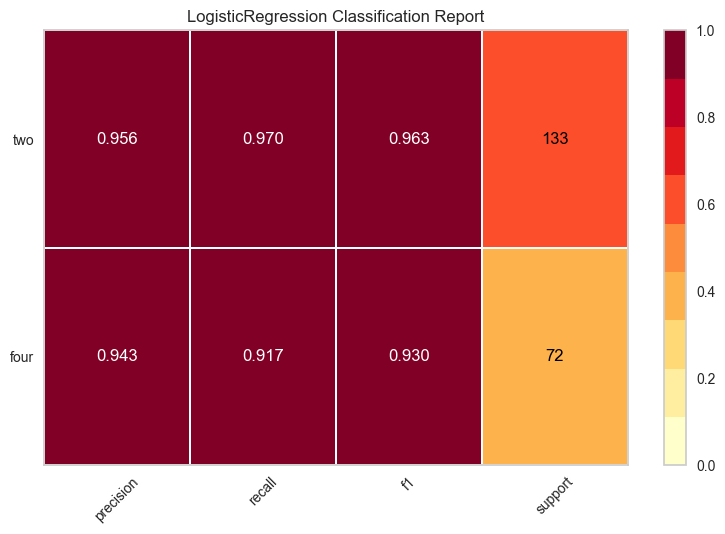

In [30]:
plot_model(tuned_lr_reg,plot='class_report')

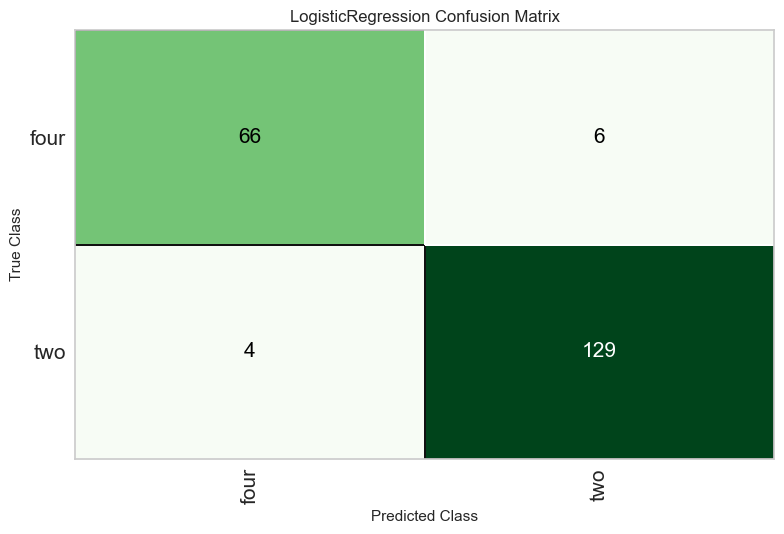

In [31]:
plot_model(tuned_lr_reg,plot='confusion_matrix')

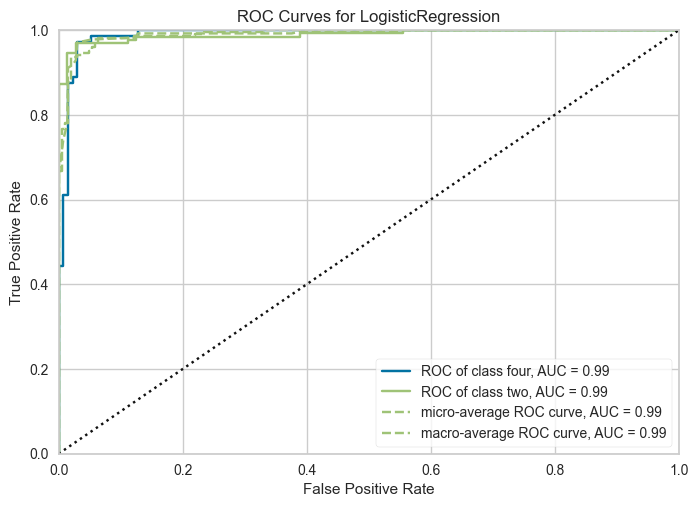

In [32]:
plot_model(tuned_lr_reg)

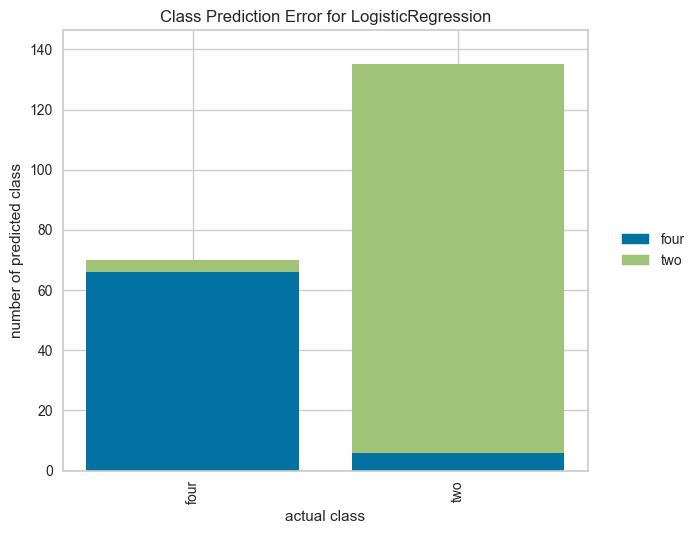

In [33]:
plot_model(tuned_lr_reg, plot = 'error')

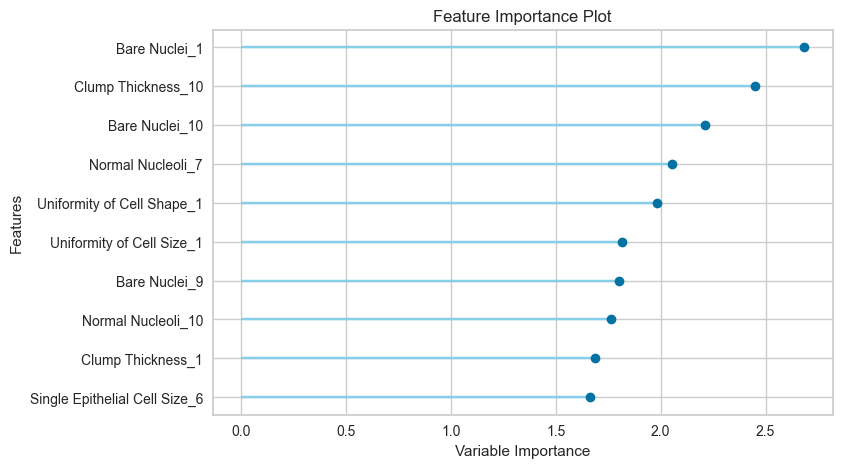

In [34]:
plot_model(tuned_lr_reg, plot='feature')

In [35]:
df_test=df.iloc[:100,:]

In [36]:
df_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,two
1,5,4,4,5,7,10,3,2,1,two
2,3,1,1,1,2,2,3,1,1,two
3,6,8,8,1,3,4,3,7,1,two
4,4,1,1,3,2,1,3,1,1,two


In [37]:
import pickle

In [38]:
pickle.dump(tuned_lr_reg,open('breast_class.pkl','wb'))

In [39]:
yenimodel_breast=pickle.load(open('breast_class.pkl','rb'))

In [40]:
evaluate_model(yenimodel_breast)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [41]:
predict_model(yenimodel_breast)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9512,0.9895,0.9699,0.9556,0.9627,0.8923,0.8925


,Clump Thickness_1,Clump Thickness_10,Clump Thickness_2,Clump Thickness_3,Clump Thickness_4,Clump Thickness_5,Clump Thickness_6,Clump Thickness_7,Clump Thickness_8,Clump Thickness_9,...,Mitoses_2,Mitoses_3,Mitoses_4,Mitoses_5,Mitoses_6,Mitoses_7,Mitoses_8,Class,Label,Score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9999
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,four,four,1.0000
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.7668
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9992
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,four,four,0.9991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,four,four,0.9977
201,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9998
202,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9997
203,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9998


In [42]:
final_yenimodel_breast = finalize_model(yenimodel_breast)

In [43]:
predict_model(final_yenimodel_breast)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9805,0.9991,0.9850,0.9850,0.9850,0.9572,0.9572


,Clump Thickness_1,Clump Thickness_10,Clump Thickness_2,Clump Thickness_3,Clump Thickness_4,Clump Thickness_5,Clump Thickness_6,Clump Thickness_7,Clump Thickness_8,Clump Thickness_9,...,Mitoses_2,Mitoses_3,Mitoses_4,Mitoses_5,Mitoses_6,Mitoses_7,Mitoses_8,Class,Label,Score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9997
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,four,four,1.0000
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9088
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9996
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,four,four,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,four,four,0.9982
201,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9989
202,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9977
203,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two,two,0.9998


In [45]:
notseen_predictions = predict_model(final_yenimodel_breast, data=df_test)
notseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,1.0000,0,0,0,0,0


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Label,Score
0,5,1,1,1,2,1,3,1,1,two,two,0.9993
1,5,4,4,5,7,10,3,2,1,two,two,0.9861
2,3,1,1,1,2,2,3,1,1,two,two,0.9971
3,6,8,8,1,3,4,3,7,1,two,two,0.6799
4,4,1,1,3,2,1,3,1,1,two,two,0.9984


In [46]:
from pycaret.utils import check_metric
check_metric(notseen_predictions.Class, notseen_predictions.Label, 'R2')

1.0

In [47]:
save_model(final_yenimodel_breast,'Final final_yenimodel_breast Model 23Jan2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=5.943000000000001, class_weight={},
                 

In [48]:
saved_yenimodel_breast= load_model('Final final_yenimodel_breast Model 23Jan2023')

Transformation Pipeline and Model Successfully Loaded


In [49]:
new_prediction_breast = predict_model(saved_yenimodel_breast, data=df_test)
new_prediction_breast.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,1.0000,0,0,0,0,0


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Label,Score
0,5,1,1,1,2,1,3,1,1,two,two,0.9993
1,5,4,4,5,7,10,3,2,1,two,two,0.9861
2,3,1,1,1,2,2,3,1,1,two,two,0.9971
3,6,8,8,1,3,4,3,7,1,two,two,0.6799
4,4,1,1,3,2,1,3,1,1,two,two,0.9984
